---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> **Example: Week05 Lecture QandA**</font></div>
---

Demo code for week 04 Lecture QandA.

**Disclaimer:** The code is done quickly to demonstrate some important concepts in decision trees and, should not be considered as an adequate approach to solve the tasks mentioned.

For this excersise lets use the `Diagnostic Wisconsin Breast Cancer Database`. The breast cancer dataset is a classic and very easy binary classification dataset.
 
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
more information on features of the dataset can be obained from: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
dataX = data['data']
datay = data['target']
feature_names = data['feature_names']

Lets separate the data into training and validation.

**I am not going to separate test data for this example. Note that this is extremely undesirable for ML. However, it is not useful here as this is just an example**

In [2]:
X_train, X_val, y_train, y_val = train_test_split(dataX, datay, random_state=0)

# Decision tree Basics

Lets write a function to plot the tree from the learning algorithm

In [3]:
import graphviz 

def get_tree_2_plot(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

Another function to get the training and vladation accuracies. I will use balanced accuracy for this example

In [4]:
from sklearn.metrics import balanced_accuracy_score

def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = balanced_accuracy_score(train_y, train_pred)
    val_acc = balanced_accuracy_score(val_y, val_pred)
    
    return train_acc, val_acc

In [5]:
def plot_decision_boundary(clf, X,y, xlabel, ylabel, poly=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.subplot(1, 1,  1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    if poly != None:
        XX = np.c_[xx.ravel(), yy.ravel()]
        XX_poly = poly.transform(XX)
        Z = clf.predict(XX_poly)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

To start lets fit a decition tree to training data. Yo can change the depth of the decition tree and observe the resulting decition tree

In [6]:
tree_max_depth = 2   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth)
clf = clf.fit(X_train, y_train)

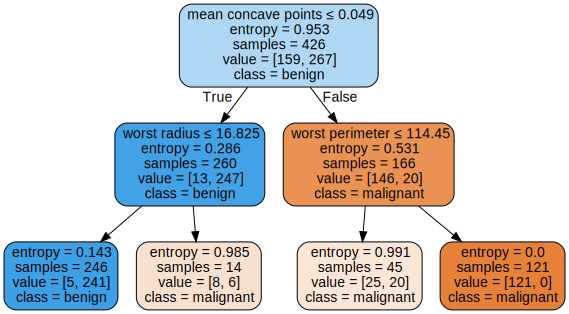

In [7]:
Dtree = get_tree_2_plot(clf)
Dtree


In [8]:
train_acc, val_acc = get_acc_scores(clf, X_train, y_train, X_val, y_val)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 0.936
Validation Accuracy score: 0.922


What would happen if we do not set the max_length parameter

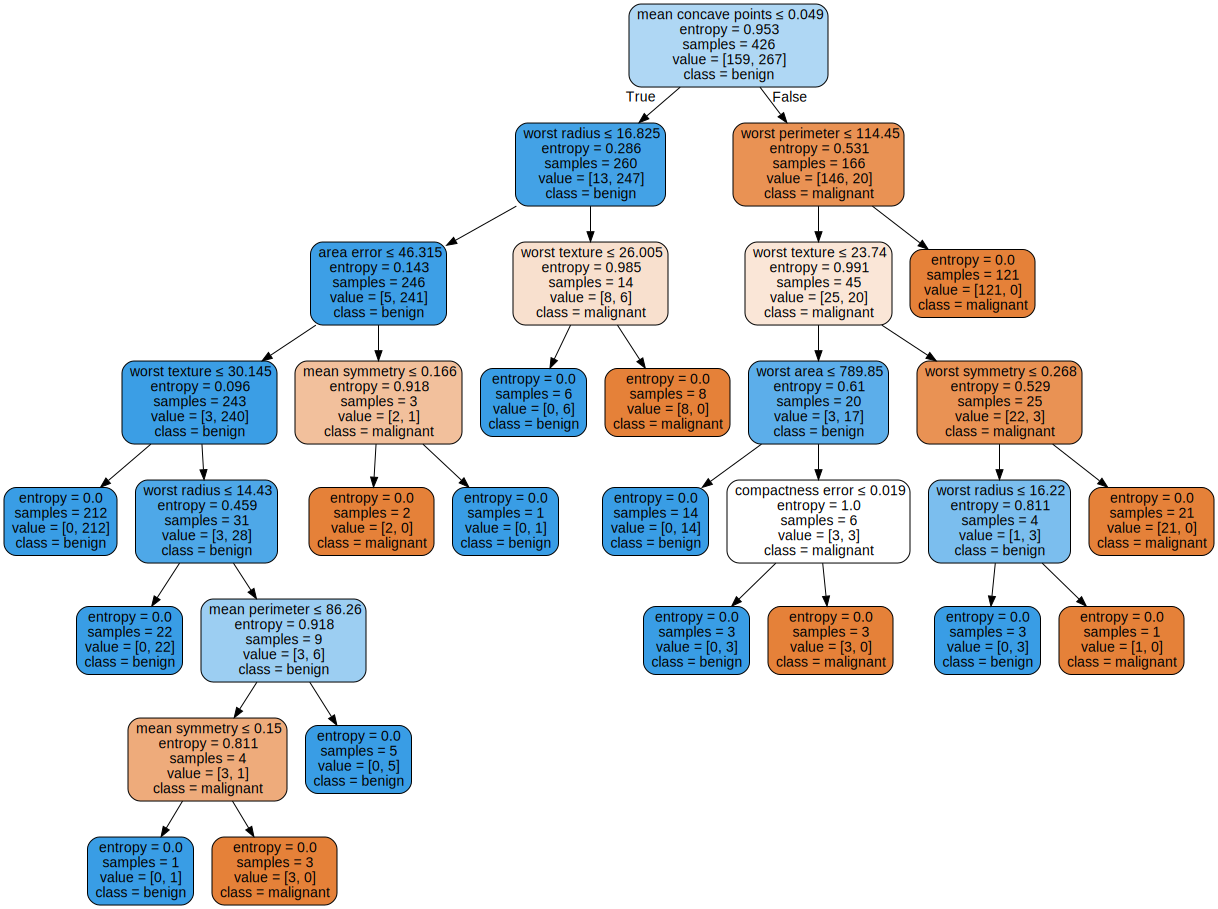

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

Dtree = get_tree_2_plot(clf)
Dtree

Is this a better model than the first tree?

In [10]:
train_acc, val_acc = get_acc_scores(clf, X_train, y_train, X_val, y_val)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 1.000
Validation Accuracy score: 0.953


We can see that the max_depth parameter controlls the complexity of the model produced by the decition tree algorithm. Therefore it is regularized for decition trees.

Lets tune the max_depth

In [11]:
max_depths = [2,4,5,8,10,11]

train_hold = list()
val_hold = list()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    
    train_acc, val_acc = get_acc_scores(clf, X_train, y_train, X_val, y_val)
    
    train_hold.append(train_acc)
    val_hold.append(val_acc)

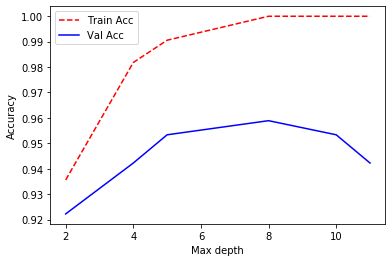

In [12]:
plt.plot(max_depths, train_hold, 'r--')
plt.plot(max_depths, val_hold, 'b-')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

`max_depth` is not the only regularized you can apply to decition trees. there are many other variables that can be used to regularize a DT. Please explore the sklearn documentation [Decision Trees](https://scikit-learn.org/stable/modules/tree.html) 

In [13]:
min_samples_splits = [2,4,5,8,10,11]
train_hold = list()
val_hold = list()

for min_samples_split in min_samples_splits:
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    clf = clf.fit(X_train, y_train)
    
    train_acc, val_acc = get_acc_scores(clf, X_train, y_train, X_val, y_val)
    
    train_hold.append(train_acc)
    val_hold.append(val_acc)

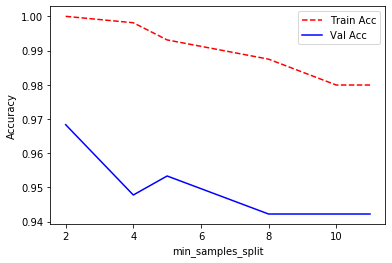

In [14]:
plt.plot(max_depths, train_hold, 'r--')
plt.plot(max_depths, val_hold, 'b-')
plt.legend(['Train Acc','Val Acc'])
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show()

## Shape of the decision boundary & complexity

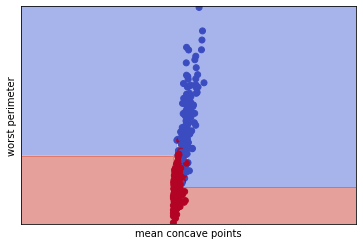

In [15]:
feature_used = (feature_names == 'mean concave points') + (feature_names == 'worst perimeter')
feature_used = [i for i, x in enumerate(feature_used) if x]
X_train_2d = X_train[:, feature_used]

clf = tree.DecisionTreeClassifier(criterion='entropy')  # , max_depth=2
clf = clf.fit(X_train_2d, y_train)

plot_decision_boundary(clf, X_train_2d,y_train, 'mean concave points', 'worst perimeter', poly=None)

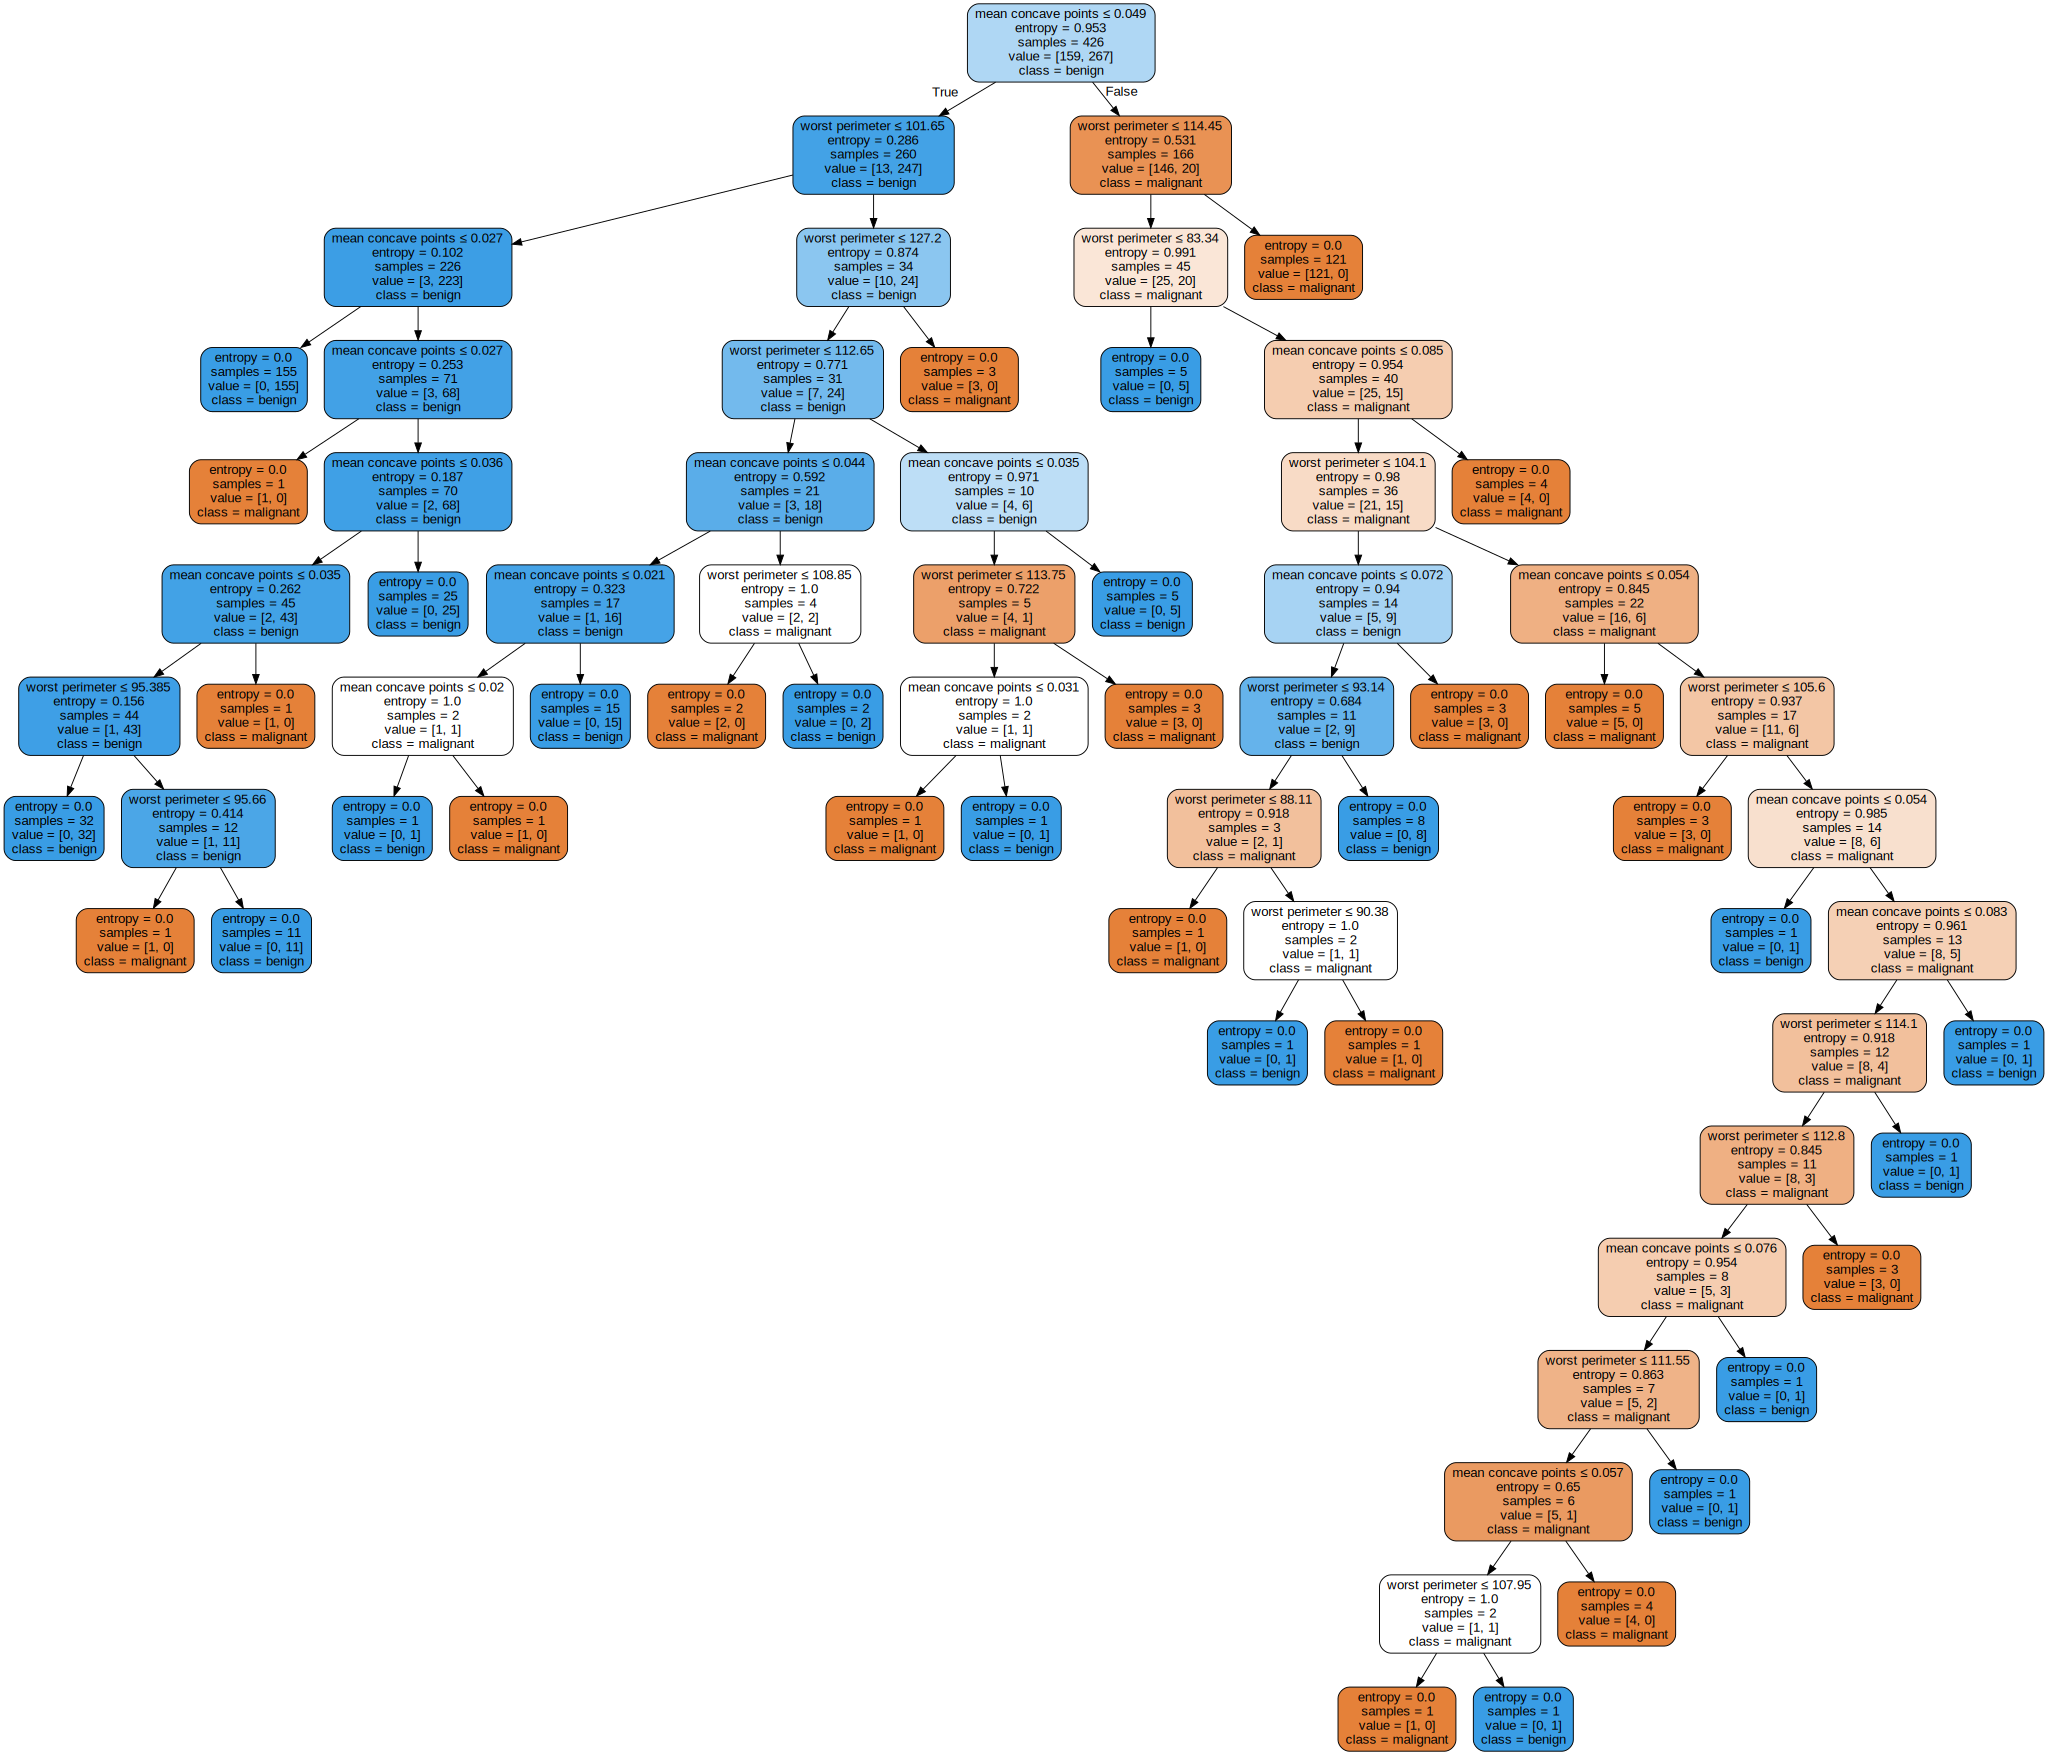

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['mean concave points', 'worst perimeter'], class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

# Post pruning decision trees with cost complexity pruning


The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Those parameters prevent the tree from growing to large size and are examples of pre prunning. 

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This algorithm finds the node with the ''weakest link'' characterized by an effective alpha. Then the nodes with the smallest effective alpha are pruned first. as the algorithm works after the tree is grown, this is a post pruning technique. 


In [17]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

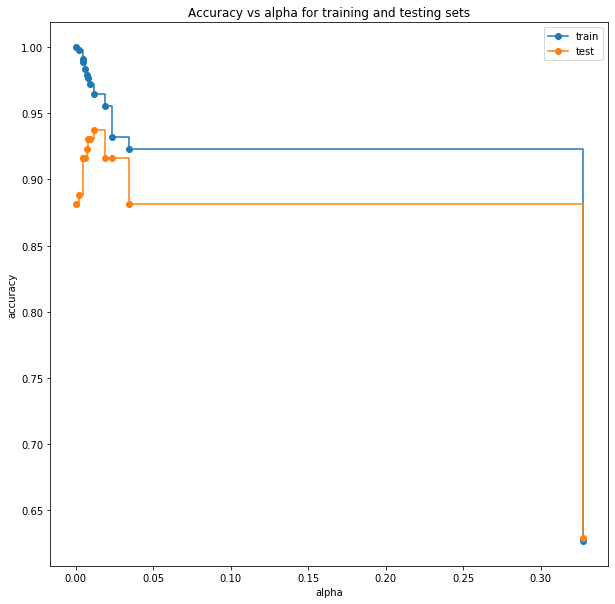

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Random forest

lets make many trees using our dataset. if we run the DT algorithm multiple times on same data, it will result in the same tree. To make different trees we can inject some randomness. Select data datapoints and features to be used in DT algorithm randomly

In [20]:
N, m = X_train.shape
num_trees = 10

clfs = list()
col_indexs = list()
val_acc_hold = list()
for i in range(0,num_trees):
    data_index = np.random.choice(N, N, replace=True)
    col_index = np.random.choice(m, np.floor(m/2).astype(np.int), replace=False)

    X_train1 = X_train[data_index, :][:, col_index]

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = clf.fit(X_train1, y_train[data_index].ravel())
    
    clfs.append(clf)
    col_indexs.append(col_index)

    X_val1 = X_val[:, col_index]

    train_acc, val_acc = get_acc_scores(clf, X_train1, y_train[data_index].ravel(), X_val1, y_val)
    print("Validation Accuracy score: {:.3f}".format(val_acc))
    val_acc_hold.append(val_acc)

Validation Accuracy score: 0.910
Validation Accuracy score: 0.886
Validation Accuracy score: 0.931
Validation Accuracy score: 0.892
Validation Accuracy score: 0.913
Validation Accuracy score: 0.891
Validation Accuracy score: 0.892
Validation Accuracy score: 0.935
Validation Accuracy score: 0.893
Validation Accuracy score: 0.901


Now lets aggreagate the output of all the trees via voting.

In [21]:
y_val_hat = np.zeros_like(y_val)
for clf, col_index in  zip(clfs, col_indexs):
    y_hat = clf.predict(X_val[:, col_index])
    y_val_hat = y_val_hat + y_hat

y_val_hat = y_val_hat/num_trees > 0.5
val_acc = balanced_accuracy_score(y_val, y_val_hat)
print("Validation Accuracy score: {:.3f}".format(val_acc))

Validation Accuracy score: 0.957


We can see that the resulting ensemble has obtained better performance than any of the individual trees. 

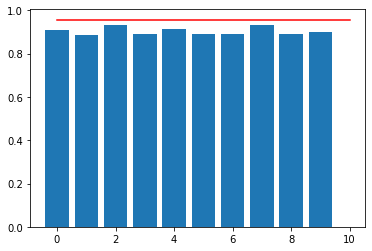

In [22]:
plt.bar(np.arange(0,num_trees), val_acc_hold)
plt.plot([0,num_trees], [val_acc,val_acc], 'r-')
plt.show()